In [ ]:
%matplotlib inline
from d2lzh import d2lzh as d2l
from mxnet import autograd, nd

In [ ]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [ ]:
num_inputs = 28 * 28
num_outputs = 10

W = nd.random.normal(scale=0.01, shape=(num_inputs, num_outputs))
b = nd.zeros(num_outputs)

In [ ]:
W.attach_grad()
b.attach_grad()

In [ ]:
def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(axis=1, keepdims=True)
    return X_exp / partition

In [ ]:
# 定义模型
def net(X):
    return softmax(nd.dot(X.reshape(-1, num_inputs), W) + b)

In [ ]:
# 定义损失函数
def cross_entropy(y_hat, y):
    return -nd.pick(y_hat, y).log() # H = -log(y_hat(k)), 其中k为y(k) = 1 

In [ ]:
# 计算分类准确率
def accuracy(y_hat, y):
    return(y_hat.argmax(axis=1) == y.astype('float32')).mean().asscalar()
    # y_hat.argmax(axis=1) 返回y_hat每行最大元素的索引
    

# 评价模型的准确率
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    
    for X,y in data_iter:
        y = y.astype('float32')
        acc_sum += (net(X).argmax(axis=1) == y).sum().asscalar()
        n += y.size
        
    return acc_sum / n

evaluate_accuracy(test_iter, net)

In [ ]:
# y = nd.array([1, 2, 0])

# y.astype('float32')
# y

# y_hat = nd.array([[0.1, 0.3, 0.6], [0.3, 0.5, 0.2], [0.5, 0.2, 0.3]])

# y_hat.argmax(axis=1)
# # y_hat.argmax(axis=1)返回的是最大值的index,dtype=float32


# (y_hat.argmax(axis=1) == y.astype('float32')).mean().asscalar()

# (y_hat.argmax(axis=1) == y.astype('float32'))

# a = nd.array([0, 1, 0])

# a.mean()

# a.mean().asscalar()

In [ ]:
# 训练模型
num_epochs, lr = 5, 0.1

def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size,
              params=None, lr=None, trainer=None,print_X_0=True):
    
    for epoch in range(num_epochs): # 对训练集的所有数据循环epochs次
        
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0 # 初始化train loss，train精度，train样本数
        
        for X, y in train_iter:
            if print_X_0 == True:
                print(X,y)
                print_X_0 = False
            with autograd.record():
                y_hat = net(X)
                l = loss(y_hat, y).sum()
            l.backward()
            if trainer is None:
                d2l.sgd(params, lr, batch_size)
            else:
                trainer.step(batch_size)
            y = y.astype('float32')
            train_l_sum += l.asscalar()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().asscalar()
            n += y.size
            
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train_acc %.3f, test_acc %.3f'
              %(epoch + 1, train_acc_sum / n, train_acc_sum / n, test_acc))

train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, batch_size,
          [W, b], lr)

前9个图实际标签 
[0 8 6 1 6 3 3 3 0]
<NDArray 9 @cpu_shared(0)>
前9个图预测标签 
[0. 8. 8. 1. 6. 4. 3. 3. 0.]
<NDArray 9 @cpu(0)>
前9个图预测准确率： 0.7777777777777778


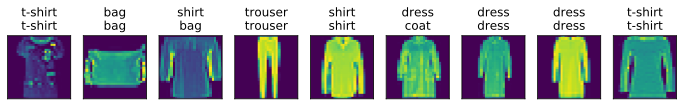

In [53]:
for X, y in train_iter:
    break

true_labels = d2l.get_fashion_mnist_labels(y.asnumpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1).asnumpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]

d2l.show_fashion_mnist(X[0:9], titles[0:9])

n = y[0:9].size

train_acc = (net(X)[0:9].argmax(axis=1) == y[0:9].astype('float32')).sum().asscalar() / n

print('前9个图实际标签', y[0:9])
print('前9个图预测标签', net(X)[0:9].argmax(axis=1,keepdims=False))
print('前9个图预测准确率：', train_acc)